<a href="https://colab.research.google.com/github/nicabey/Numerical-Methods/blob/main/Group_Project_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 
Numerical Methods 

Dr. Jacob 

Laxman Bista, Ritu Maharajan, Nichole Beyer, David Evans 

We will be using the same code from the last project, below are the error computing functions created to estimate $sinx$ at the point $\frac\pi2$

In [ ]:


import math
pi = math.pi
 
def absolute_error(expected_value, actual_value_observed):
    return actual_value_observed - expected_value
def relative_error(expected_value, actual_value_observed):
    return absolute_error(expected_value, actual_value_observed)/actual_value_observed
def approximate_error(previous_value, current_value):
    return current_value - previous_value
def app_relative_error(previous_value, current_value):
    return approximate_error(previous_value, current_value)/current_value

def taylorCoefficient(n):
  return (-1)**(n)/(math.factorial(2*n))

def taylorPolynomialTerms(n, input):
    return taylorCoefficient(n)*((input-pi/2)**(2*n))

def taylorPolynomial(n, input):
    sum = 0
    for i in range(0, n+1):
     sum = sum + taylorPolynomialTerms(i, input)
    return sum

##Derivative Functions 



Here, we are going to define 3 functions which are
- forward difference
- Backward difference
- Central difference for the derivative

Forward Difference is $$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}
$$
The backward difference is
$$
f'(x_0)\approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}
$$

The central difference is
$$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x}
$$
We will also write down the formula for the finite difference of the second order derivative
$$
f''(x_0)\approx \frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\left(\Delta x\right)^2}
$$

In [ ]:
def forwardDifference(function,start_point,move):
  return (function(start_point+move)-function(start_point))/move

def backwardDifference(function,start_point,move):
  return (function(start_point)-function(start_point-move))/move

def centralDifference(function,start_point,move):
  return (function(start_point+move)-function(start_point-move))/(2*move)

def finiteDifference(function,start_point,move):
  return (function(start_point+2*move)-2*function(start_point+move)+function(start_point))/move**2

In [ ]:
moves = [1, .1 , .01 , .001,.0001]
forward = [forwardDifference(math.sin, pi/4,x) for x in moves]
backward = [backwardDifference(math.sin, pi/4,x) for x in moves]
central = [centralDifference(math.sin, pi/4,x) for x in moves]
finite = [finiteDifference(math.sin, pi/4,x) for x in moves]


actualOne = 1/math.sqrt(2)

absoluteforward = [absolute_error(expected_value,actualOne) for expected_value in forward]
relativeforward = [relative_error(expected_value, actualOne) for expected_value in forward]

absolutebackward = [absolute_error(expected_value,actualOne) for expected_value in backward]
relativebackward = [relative_error(expected_value, actualOne) for expected_value in backward]

absolutecentral = [absolute_error(expected_value,actualOne) for expected_value in central]
relativecentral = [relative_error(expected_value, actualOne) for expected_value in central]

actualSecond = -1/math.sqrt(2) 

absolutefinite = [absolute_error(expected_value,actualSecond) for expected_value in finite]
relativefinite = [relative_error(expected_value, actualSecond) for expected_value in finite]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}]]
)


fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Forward Estimate', 'Absolute Error','Relative Error']),
                cells=dict(values = [moves,forward,absoluteforward,relativeforward])),row = 1, col = 1)
                     

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                cells=dict(values = [moves,backward,absolutebackward,relativebackward])),row = 2, col = 1)
                     
fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                cells=dict(values = [moves,central,absolutecentral,relativecentral])),row = 3, col = 1)

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                cells=dict(values = [moves,finite,absolutefinite,relativefinite]))
                     ,row = 4, col = 1)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [moves,backward,absolutebackward,relativebackward]))
                     ])
fig.show()

In [ ]:
def lagrangecoef(inputArray,outputArray,entry,variable):
  LAGCO = 1
  for i in range(len(inputArray)):
    if i == entry:
      continue
    else:
      LAGCO = LAGCO*(variable - inputArray[i])/(inputArray[entry]-inputArray[1])
  return LAGCO

def lagrangeIntro(inputArray, outputArray, variable):
  LAGINT = 0 
  for i in range(len(inputArray)):
    LAGINT = LAGINT + lagrangecoef(inputArray,outputArray,i,variable)*outputArray[i]
  return LAGINT

In [ ]:
import math

inputValues = [math.pi/2,math.pi+.1/2,math.pi]
outputValues = [math.sin(x) for x in inputValues]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


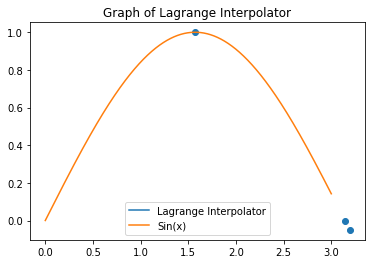

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange( 0,3,0.001)
plt.scatter(inputValues, outputValues)
plt.plot(x, lagrangeIntro(inputValues,outputValues,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator','Sin(x)'])

plt.show()


Our graph doesn't put the line to connect the 3 points but you can imagine its there, it would be a good approximation but not exact. 